# Code for visualizations

In [1]:
import sys
sys.path.append('./graphparser/')
import graphparser as gp
import pandas as pd
import custom_meter_graph as cmg
import logging,sys,codecs,re
reload (gp)
reload (cmg)#,pd,cmg)
pp = gp.GraphParser('settings/urdu-meter.yaml',blank=' ')

Couldn't import dot_parser, loading of dot files will not be possible.


## Classical Meter Example (Mirza Ghalib)

In [2]:
meter = '=-===-===-===-='
scanner = cmg.CustomMeterGraph(meter)
df = pd.DataFrame(columns = [x for x in meter])
df

,=,-,=,=,=,-,=,=,=,-,=,=,=,-,=


In [3]:

for i,x in enumerate(['naqsh faryaadii hai kis kii sho;xii-e ta;hriir kaa', 
                      'kaa;ga;zii hai pairahan har paikar-e ta.sviir kaa']):
    scan = scanner.graph_scan(x)[0]#'naqsh faryaadii hai kis kii sho;xii-e ta;hriir kaa')[0]
    matched_tokens=[''.join(m.matched_tokens) for m in scan.matches]
    orig_tokens=[''.join(m.orig_tokens) for m in scan.matches]
    phonetic_tokens = [m.ipa for m in scan.matches]
    df.loc['line '+str(i+1)]=orig_tokens
    df.loc['line '+str(i+1)+ ' IPA']=phonetic_tokens
df.sort_index(inplace=True)
df

,=,-,=,=,=,-,=,=,=,-,=,=,=,-,=
line 1,naq,sh,far,yaa,dii,hai,kis,kii,sho,;xii,-e,ta;h,rii,r,kaa
line 1 IPA,nəq,ʃ,fəɾ,jaː,d̪iː,ɦɛˑ,kɪs,kiː,ʃoː,xiˑ,eː,t̪əɦ,ɾiː,ɾ,kaː
line 2,kaa,;ga,;zii,hai,pai,ra,han,har,pai,ka,r-e,ta.s,vii,r,kaa
line 2 IPA,kaː,ɣə,ziː,ɦɛː,pɛː,ɾə,ɦən,ɦəɾ,pɛː,kə,ɾeː,t̪əs,ʋiː,ɾ,kaː


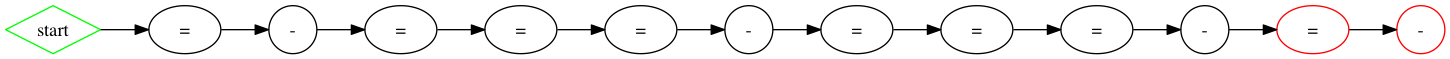

In [4]:

def draw_meter(m, rankdir='TB'):
    import networkx as nx
    from IPython.display import Image

    g = m.DG

    for i,n in g.node.iteritems():
        labels = {'0': 'start', '=': u'=', '-': u'-'}
        n['label'] = labels[ n['type'] ]

        if n['type']=='0':
            n['color'] = 'green'
            n['shape'] = 'diamond'
        elif n['type']=='=':
            n['shape'] = 'oval'
        else:
            assert(n['type']=='-')
            n['shape'] = 'circle'
        if 'ending' in n or 'meter_type' in n:
            n['color'] = 'red' 
        
    d = nx.to_pydot(g )
    d.set_rankdir(rankdir)


    #d.set_label(0,  'hi')
    png_str = d.create_png()
    return png_str

    #Image(data=png_str)
#    return Image


from IPython.display import Image

scanner_classical = cmg.CustomMeterGraph('=-===-===-=(-)')
png = draw_meter(scanner_classical,rankdir='LR')

with open('classical_meter.png','w') as f: 
    f.write(png)#draw_meter(scanner))

Image(filename='classical_meter.png')# draw_meter(scanner) )

## Modern Meter Example

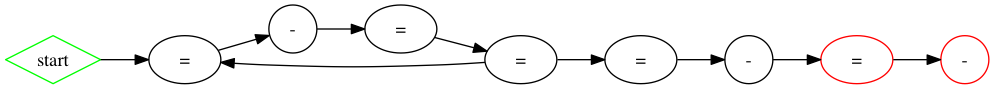

In [5]:
scanner_modern = cmg.CustomMeterGraph('[=-==]+=-=(-)')
png = draw_meter(scanner_modern,rankdir='LR')

with open('modern_meter.png','w') as f: 
    f.write(png)#draw_meter(scanner))

Image(filename='modern_meter.png')# draw_meter(scanner) )

## Classical Meters of Mirza Ghalib as Graph

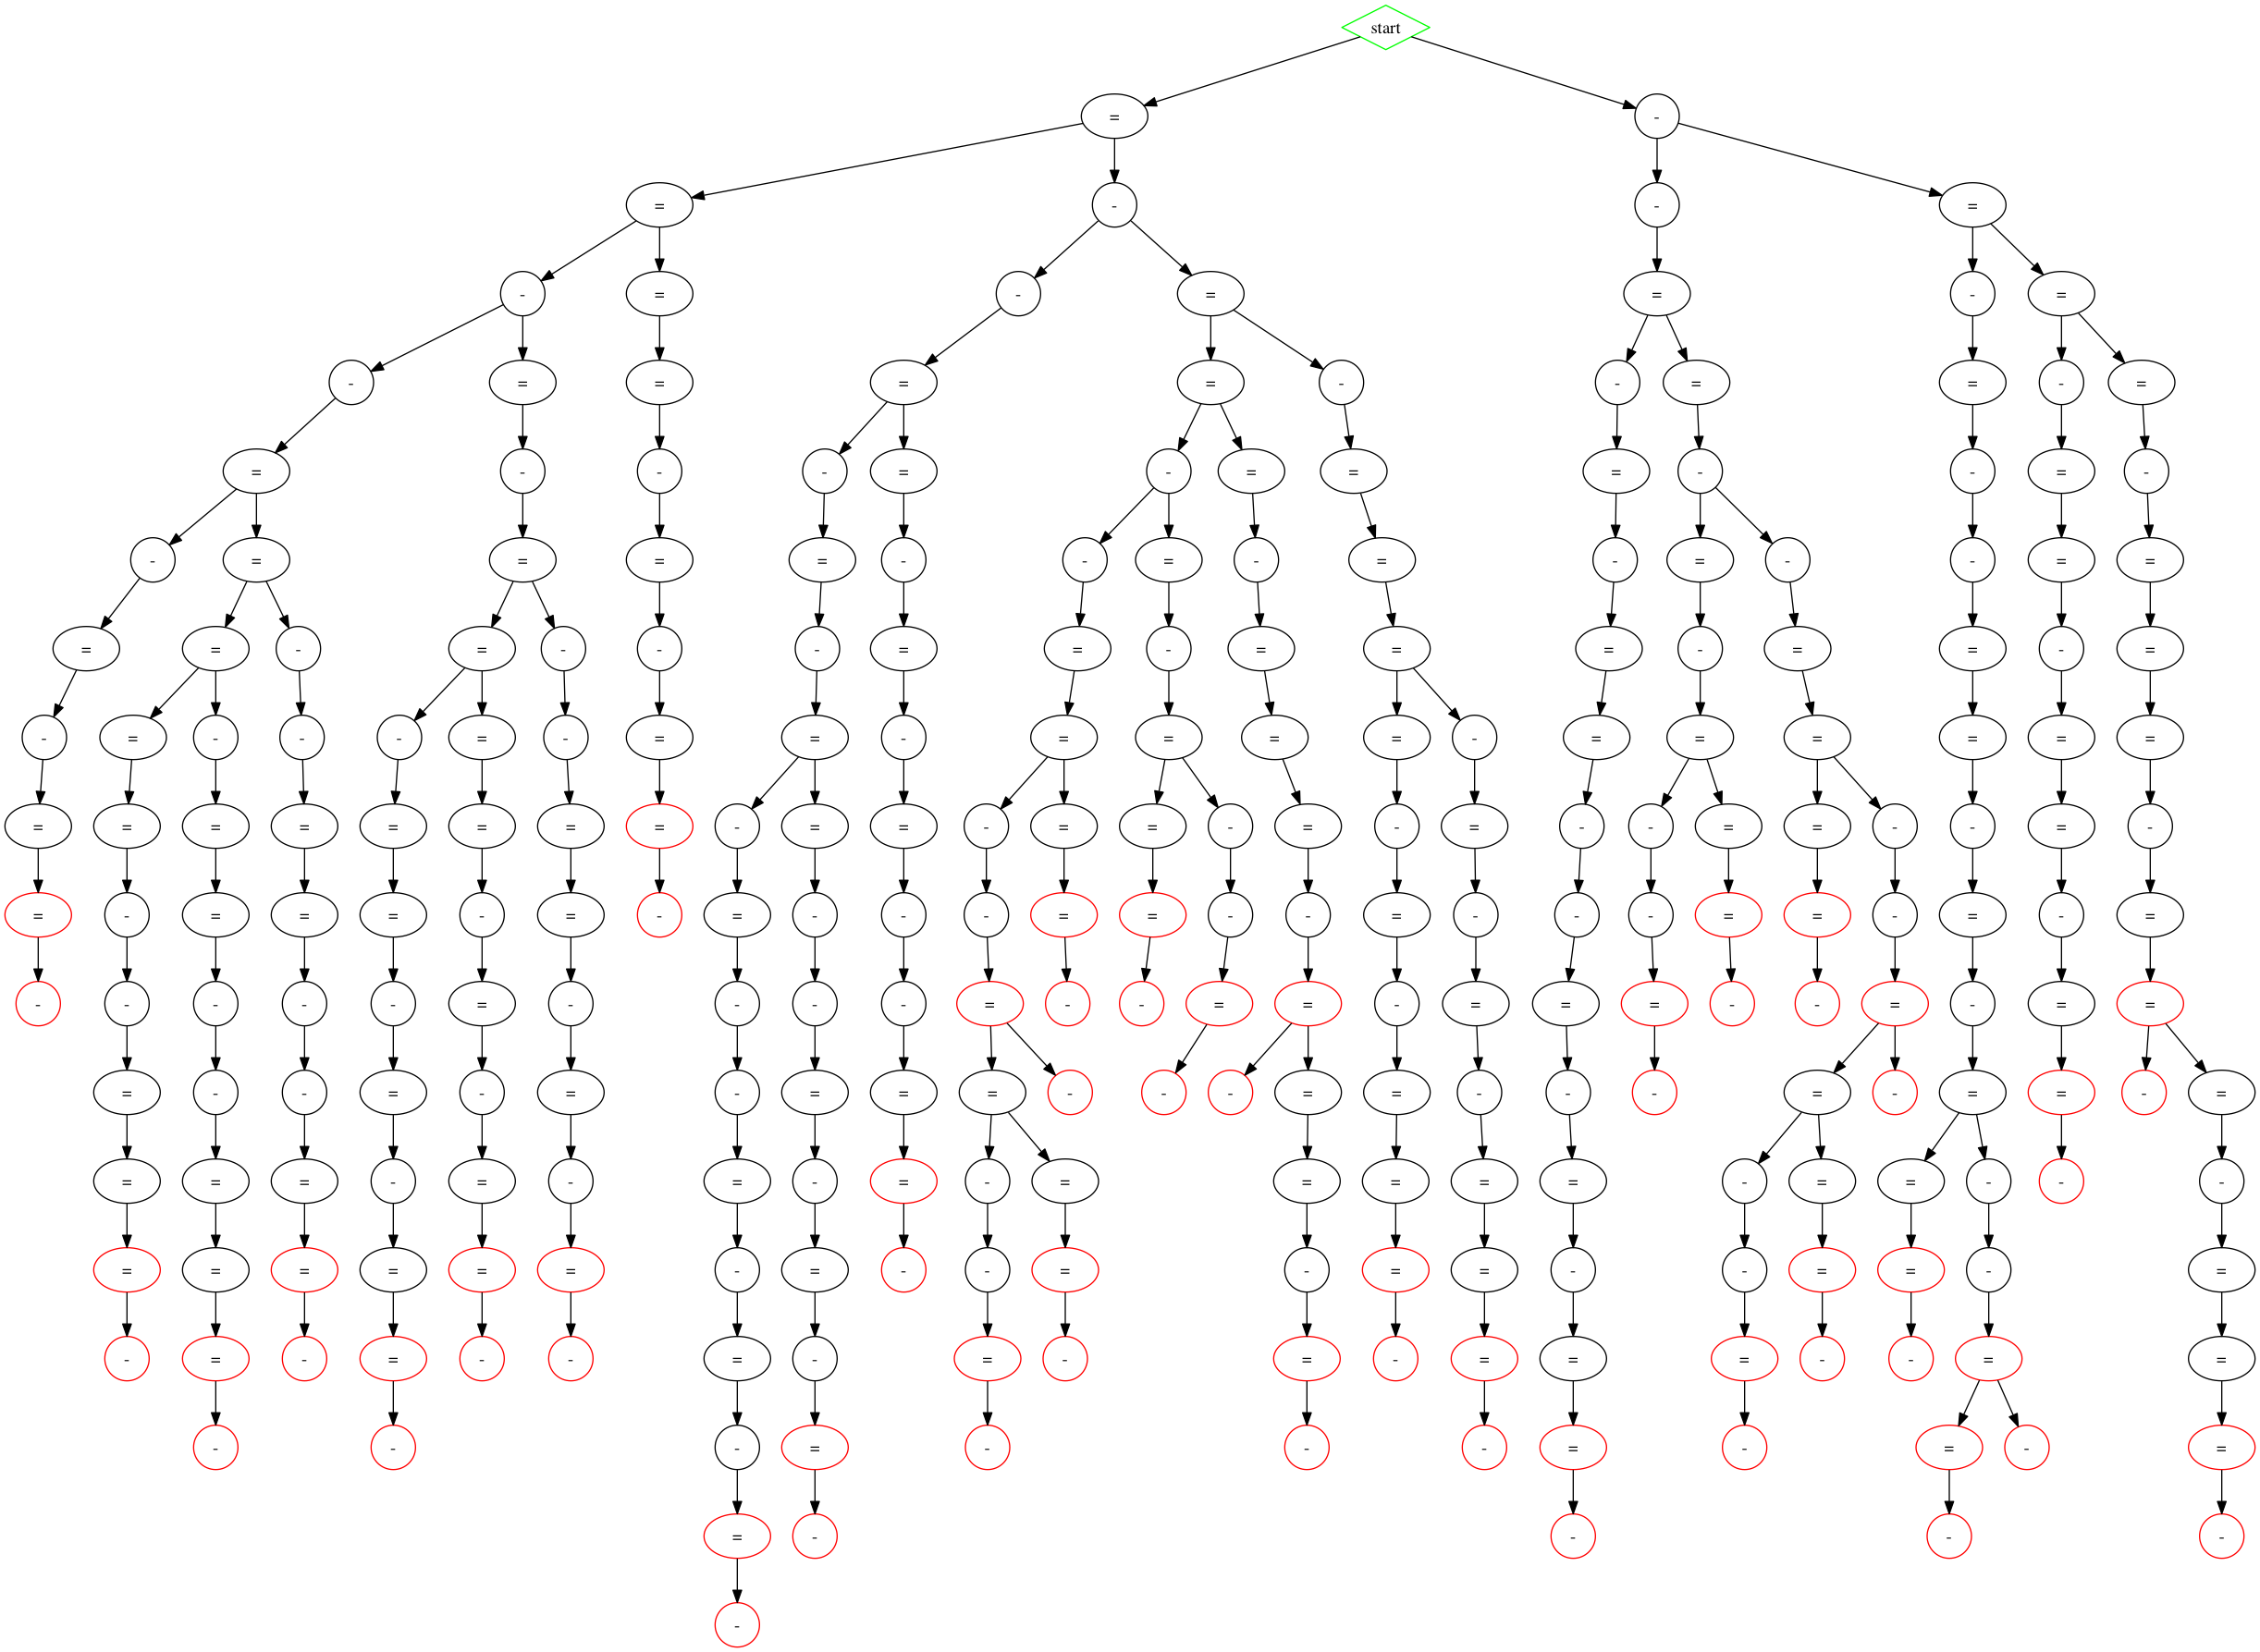

In [6]:
import meter_graph as mg
ghalib_meters = mg.MeterGraph()
ghalib_png = draw_meter(ghalib_meters)
with open('ghalib_meters.png','w') as f: 
    f.write(ghalib_png)#draw_meter(scanner))

Image(filename='ghalib_meters.png')

## Graph of Free-verse "Hindi" Meter 

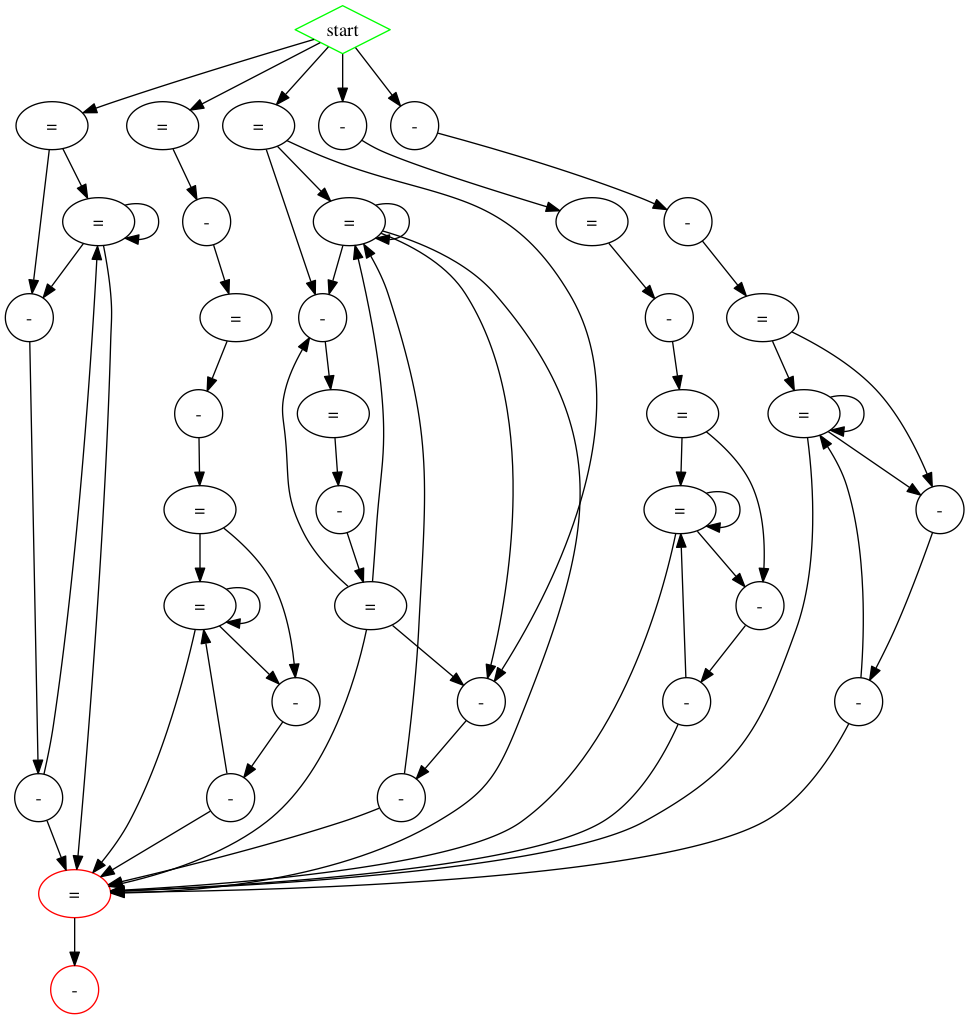

In [15]:
import scanning

hindi_scanner = scanning.get_hindi_scanner()

hindi_png=draw_meter(hindi_scanner)
with open('hindi_meter.png','w') as f: 
    f.write(hindi_png)#draw_meter(scanner))

Image(filename='hindi_meter.png')


## Example from Miraji of "Hindi meter" Verses

In [16]:
lines = [' bas dekhaa aur phir bhuul gayaa',' jab ;husn nigaaho;n me;n aayaa']
df  = []
def count(x):
    count=0
    for c in x:
        if c=='=':
            count+=2 
        else: 
            count+=1
    return count
for x in lines:
    scan = hindi_scanner.graph_scan(x)[0].scan
    df.append({ 'text':x, 'scan': scan, 'count':count(scan)})

pd.DataFrame(df, columns=['text','scan','count'])

,text,scan,count
0,bas dekhaa aur phir bhuul gayaa,======--=,16
1,jab ;husn nigaaho;n me;n aayaa,==--=====,16
